# Ground Truth problems

These are problems for which the data generating process is a known model, 

$$ y = \phi^*(\mathbf{x}, \theta^*) $$

We assess how well symbolic regression algorithms find the form of the model, $\phi^*$, with some leniency on $\theta^*$ (we allow the model to be off by a constant or a scalar). 

In [1]:
symbolic_algs = [
    'AFP', 
    'AFP_FE',
    'BSR',
    'DSR',
    'FFX',
    'FEAT',
    'EPLEX',
    'GP-GOMEA',
    'gplearn',
    'ITEA', 
    'MRGP', 
    'Operon',
    'SBP-GP',
    'AIFeynman',

    'Brush',
    'Brush wo split',
    'Brush (D-UCB1)',
    'Brush (C-D-UCB1)',
    'Brush (D-TS)',
    'Brush (C-D-TS)',
    'Brush wo split (D-UCB1)',
    
    # Fixed labels
    'Brush w/ split (no MAB)',

    'Brush w/o split (no MAB)',
    'Brush w/o split (D-UCB1)',

    'Brush w/ split (D-UCB1)',
    'Brush w/ split (C-D-UCB1)',
    'Brush w/ split (D-TS)',
    'Brush w/ split (C-D-TS)',

    # short fixed labels
    'Brush_0',
    'Brush+S',
    'Brush+M',
    'Brush+SM',
]
nongp_algs = [
    'BSR',
    'DSR',
    'AIFeynman'
]
gp_algs = [
    'AFP', 
    'AFP_FE',
    'FFX',
    'FEAT',
    'EPLEX',
    'GP-GOMEA',
    'gplearn',
    'ITEA', 
    'MRGP', 
    'Operon',
    'SBP-GP',

    'Brush',
    'Brush wo split',
    'Brush (D-UCB1)',
    'Brush (C-D-UCB1)',
    'Brush (D-TS)',
    'Brush (C-D-TS)',
    'Brush wo split (D-UCB1)',
    
    # Fixed labels
    'Brush w/ split (no MAB)',

    'Brush w/o split (no MAB)',
    'Brush w/o split (D-UCB1)',

    'Brush w/ split (D-UCB1)',
    'Brush w/ split (C-D-UCB1)',
    'Brush w/ split (D-TS)',
    'Brush w/ split (C-D-TS)',

    # short fixed labels
    'Brush_0',
    'Brush+S',
    'Brush+M',
    'Brush+SM',
]

In [2]:
import pandas as pd
import json
import numpy as np
from glob import glob
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('pdf', fonttype=42)
matplotlib.rc('ps', fonttype=42)

import os
sns.set(font_scale=1.25, style='whitegrid')
sns.set(palette='rocket')
sns.set_palette('rocket')
sns.set_style("whitegrid")

rdir = '../results/'
# figdir = 'figs/ground-truth/'
figdir = '../paper/figs/results_sym_data/'

print('figdir:',figdir)
def save(h=None,name='tmp'):
    name = name.strip().replace(' ','-').replace('%','pct')
    if h == None:
        h = plt.gcf()
    h.tight_layout()
    print('saving',name+'.pdf')
    if not os.path.exists(figdir):
        os.makedirs(figdir)
    plt.savefig(figdir+'/'+name+'.pdf', dpi=400, bbox_inches='tight')
    

figdir: ../paper/figs/results_sym_data/


In [3]:
# # Loading backup and getting specific models
# df_results = pd.read_feather('../results/ground-truth_solns-e3.feather.bak')

# df_results.reset_index()

# # Removing mislabeled datasets (these are clf, but PMLB v1.0 had it as regr)
# # df_results = df_results[ df_results["algorithm"].isin(["uDSR"]) ]

# df_results = df_results.drop(columns=['symbolic_solution'])

# print('mean trial count:')
# print(df_results.groupby('algorithm')['dataset'].count().sort_values()
#       / df_results.dataset.nunique())

# # df_results.reset_index().to_feather('../results/ground-truth_results_dso_no-const_no-gp.feather')

# read data from feather

In [4]:
df_results = pd.read_feather('../results/ground-truth_results_srbench.feather')

# df_results = pd.concat([pd.read_feather('../results/ground-truth_results_brush_250.feather'), df_results], axis=0)
df_results = pd.concat([pd.read_feather('../results/ground-truth_results_brush_500.feather'), df_results], axis=0)

# df_results = pd.concat([pd.read_feather('../results/ground-truth_results_dso_const_gp.feather'), df_results], axis=0)
df_results = pd.concat([pd.read_feather('../results/ground-truth_results_dso_no-const_no-gp.feather'), df_results], axis=0)

df_results = pd.concat([pd.read_feather('../results/ground-truth_results_tpsr.feather'), df_results], axis=0)
df_results = pd.concat([pd.read_feather('../results/ground-truth_results_e2et.feather'), df_results], axis=0)

df_results['algorithm'] = df_results['algorithm'].str.replace(r'^Brush$', r'Brush w/ split (no MAB)', regex=True)
df_results['algorithm'] = df_results['algorithm'].str.replace(r'^Brush wo split$', r'Brush w/o split (no MAB)', regex=True)
df_results['algorithm'] = df_results['algorithm'].apply(lambda x: x.replace('Brush wo', r'Brush w/o'))
df_results['algorithm'] = df_results['algorithm'].apply(lambda x: x.replace('Brush (', r'Brush w/ split ('))

# Short labels
df_results['algorithm'] = df_results['algorithm'].apply(lambda x: x.replace('Brush w/o split (no MAB)',r'$Brush_0$'))
df_results['algorithm'] = df_results['algorithm'].apply(lambda x: x.replace('Brush w/ split (no MAB)','Brush+S'))
df_results['algorithm'] = df_results['algorithm'].apply(lambda x: x.replace('Brush w/o split (D-UCB1)','Brush+M'))
df_results['algorithm'] = df_results['algorithm'].apply(lambda x: x.replace('Brush w/ split (D-UCB1)','Brush+SM'))

# Visualize different mabs.
# df_results['algorithm'] = df_results['algorithm'].apply(lambda x: x.replace('Brush+SM','Brush+M (D-UCB1)'))
# df_results['algorithm'] = df_results['algorithm'].apply(lambda x: x.replace('Brush w/ split (C-D-UCB1)','Brush+M (C-D-UCB1)'))
# df_results['algorithm'] = df_results['algorithm'].apply(lambda x: x.replace('Brush w/ split (D-TS)','Brush+M (D-TS)'))
# df_results['algorithm'] = df_results['algorithm'].apply(lambda x: x.replace('Brush w/ split (C-D-TS)','Brush+M (C-D-TS)'))

df_results['*algorithm*'] = df_results['algorithm'].apply(lambda x: '*'+x if x in symbolic_algs else x)

print('mean trial count:')
print(df_results.groupby('algorithm')['dataset'].count().sort_values()
      / df_results.dataset.nunique())

mean trial count:
algorithm
Brush+S      12.592308
Brush+SM     12.653846
TPSR+E2E     29.369231
AIFeynman    35.915385
FEAT         36.169231
E2E          37.261538
gplearn      37.523077
MRGP         37.838462
EPLEX        38.000000
AFP          38.000000
BSR          38.000000
SBP-GP       38.000000
DSR          38.000000
FFX          38.000000
GP-GOMEA     38.000000
ITEA         38.000000
$Brush_0$    38.546154
Brush+M      38.546154
AFP_FE       40.000000
Operon       40.000000
uDSR         40.000000
Name: dataset, dtype: float64


In [5]:
# removing specific models (for results reporting --- there is several papers using these results)

print(df_results.shape)
df_results = df_results[ ~df_results["algorithm"].isin([
    # Comment out which you want to use in the plots
    # 'Brush_0',
    'Brush+S',
    # 'Brush+M',
    'Brush+SM',

    'Brush w/ split (no MAB)',
    'Brush w/o split (no MAB)',
    'Brush w/o split (D-UCB1)',

    'Brush w/ split (D-UCB1)',
    'Brush w/ split (C-D-UCB1)',
    'Brush w/ split (D-TS)',
    'Brush w/ split (C-D-TS)',

    # "uDSR",
    # "E2E",
    # "TPSR+E2E",
    # "NeSymRes 10M",
    # "NeSymRes 100M",
]) ]


print(df_results.shape)

(96254, 32)
(92972, 32)


In [6]:
print(df_results["algorithm"].unique())
df_results[df_results["algorithm"]=="FEAT"]

['E2E' 'TPSR+E2E' 'uDSR' '$Brush_0$' 'Brush+M' 'FEAT' 'AFP' 'DSR' 'FFX'
 'GP-GOMEA' 'ITEA' 'Operon' 'AIFeynman' 'BSR' 'EPLEX' 'AFP_FE' 'gplearn'
 'MRGP' 'SBP-GP']


,dataset,algorithm,random_state,training time (s),symbolic_model,mse_train,mae_train,r2_train,mse_test,mae_test,...,symbolic_fraction_is_constant,sympy_exception,training time (hr),r2_zero_test,symbolic_alg,data_group,symbolic_solution,index,process_time,*algorithm*
0,feynman_III_10_19,FEAT,29910,7477.133516,16.4356+-9.06*(0.1340*(0.0948*x_0-0.4616*(0.03...,5.158905e-03,4.934706e-02,0.999902,4.657973e-03,4.577807e-02,...,False,None,2.076982,0.999911,NaN,Feynman,False,NaN,7472.385775,*FEAT
9,feynman_III_10_19,FEAT,23654,636.218597,16.3018+6.28*x_0+5.44*(0.8835*x_3+0.2564*x_1)+...,7.122876e+00,2.167380e+00,0.873671,4.012022e+00,1.710611e+00,...,False,None,0.176727,0.924955,NaN,Feynman,False,NaN,635.630530,*FEAT
191,feynman_III_10_19,FEAT,14423,7576.555284,16.466+-13.74*(0.0375*x_0-0.8222*x_2)+10.10*(0...,1.545038e-03,2.661330e-02,0.999971,1.679500e-03,2.710005e-02,...,False,None,2.104599,0.999968,NaN,Feynman,False,NaN,7570.953067,*FEAT
192,feynman_III_10_19,FEAT,14423,7059.683217,16.4656+-6.52*(0.0144*exp(0.5034*(0.2403*x_1-0...,4.635524e-03,4.889632e-02,0.999913,4.473421e-03,4.674296e-02,...,False,None,1.961023,0.999914,NaN,Feynman,False,NaN,7056.197374,*FEAT
193,feynman_III_10_19,FEAT,14423,2549.147430,16.4629+4.38*(0.3638*x_1+1.0988*x_3)+-3.35*(0....,4.836700e-02,1.729812e-01,0.999097,1.619409e-02,9.277797e-02,...,False,None,0.708097,0.999689,NaN,Feynman,False,NaN,2541.692349,*FEAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68830,strogatz_vdp2,FEAT,5390,148.743288,-0.0494531+-0.09*x_0,2.062118e-17,3.499304e-09,1.000000,2.039534e-17,3.579783e-09,...,False,None,0.041318,1.000000,NaN,Strogatz,False,NaN,148.680772,*FEAT
68831,strogatz_vdp2,FEAT,5390,178.787194,-0.0494504+-0.09*x_0,1.073537e-08,8.326731e-05,0.999999,1.766185e-10,1.225463e-05,...,False,None,0.049663,1.000000,NaN,Strogatz,False,NaN,178.228066,*FEAT
68832,strogatz_vdp2,FEAT,860,183.814810,-0.050107+-0.09*x_0,1.912654e-17,3.424174e-09,1.000000,2.227791e-17,3.519332e-09,...,False,None,0.051060,1.000000,NaN,Strogatz,False,NaN,183.729596,*FEAT
68833,strogatz_vdp2,FEAT,860,195.807367,-0.0501146+-0.09*x_0,9.843030e-09,7.901096e-05,0.999999,7.171177e-11,6.915918e-06,...,False,None,0.054391,1.000000,NaN,Strogatz,False,NaN,194.623040,*FEAT


# compute symbolic solutions

In [7]:
df_results.loc[:,'symbolic_solution'] = df_results[['symbolic_error_is_zero',
                                                    'symbolic_error_is_constant',
                                                    'symbolic_fraction_is_constant']
                                                   ].apply(any,raw=True, axis=1)
print(df_results['algorithm'].unique())
display(df_results.sample(3).T)

# clean up any corner cases (constant models, failures)
df_results.loc[:,'symbolic_solution'] = df_results['symbolic_solution'] & ~df_results['simplified_symbolic_model'].isna() 
df_results.loc[:,'symbolic_solution'] = df_results['symbolic_solution'] & ~(df_results['simplified_symbolic_model'] == '0')
df_results.loc[:,'symbolic_solution'] = df_results['symbolic_solution'] & ~(df_results['simplified_symbolic_model'] == 'nan')

display(df_results.sample(3).T)
print(df_results['algorithm'].unique())

# save results for detailed tabulating
df_results.reset_index(drop=True).to_feather(rdir+'ground-truth_solns.feather')

['E2E' 'TPSR+E2E' 'uDSR' '$Brush_0$' 'Brush+M' 'FEAT' 'AFP' 'DSR' 'FFX'
 'GP-GOMEA' 'ITEA' 'Operon' 'AIFeynman' 'BSR' 'EPLEX' 'AFP_FE' 'gplearn'
 'MRGP' 'SBP-GP']


/tmp/ipykernel_599973/3489882167.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_results.loc[:,'symbolic_solution'] = df_results[['symbolic_error_is_zero',


,40011,8449,25474
dataset,feynman_I_32_5,feynman_III_12_43,feynman_I_12_1
algorithm,DSR,Brush+M,DSR
random_state,15795,4426,16850
training time (s),605.411525,620.43161,1392.308259
symbolic_model,x1*(x2 - 1)/(x3*x4**3),"Mul(0.40*n,0.40*h)",x1*(x2 + sin(1/(x1*(-x1 - x2*exp(x2 + exp(x2)/...
mse_train,0.044586,0.0,0.010851
mae_train,0.075074,0.0,0.083291
r2_train,0.921121,1.0,0.99958
mse_test,0.053231,0.0,0.000009
mae_test,0.079129,0.0,0.001272


,33378,19050,10814
dataset,feynman_I_18_4,feynman_II_36_38,feynman_II_13_23
algorithm,SBP-GP,SBP-GP,AFP_FE
random_state,29910,4426,15795
training time (s),28975.504995,29028.351186,28819.399359
symbolic_model,1017899.877382+-200787.362737*((((1.223921+(si...,-1.693028+-0.196229*((((0.176674+(1.048691*(((...,(1.01*exp((sqrt(|((((((sin(x_1)^2)*cos(0.006))...
mse_train,0.098482,0.002212,0.111109
mae_train,0.250904,0.032911,0.266097
r2_train,0.881967,0.998253,0.929288
mse_test,0.000942,0.002208,0.000321
mae_test,0.023036,0.033004,0.012275


['E2E' 'TPSR+E2E' 'uDSR' '$Brush_0$' 'Brush+M' 'FEAT' 'AFP' 'DSR' 'FFX'
 'GP-GOMEA' 'ITEA' 'Operon' 'AIFeynman' 'BSR' 'EPLEX' 'AFP_FE' 'gplearn'
 'MRGP' 'SBP-GP']


In [8]:
df_results["algorithm"].unique()

array(['E2E', 'TPSR+E2E', 'uDSR', '$Brush_0$', 'Brush+M', 'FEAT', 'AFP',
       'DSR', 'FFX', 'GP-GOMEA', 'ITEA', 'Operon', 'AIFeynman', 'BSR',
       'EPLEX', 'AFP_FE', 'gplearn', 'MRGP', 'SBP-GP'], dtype=object)

In [9]:
df_results["*algorithm*"].unique()

array(['E2E', 'TPSR+E2E', 'uDSR', '$Brush_0$', '*Brush+M', '*FEAT',
       '*AFP', '*DSR', '*FFX', '*GP-GOMEA', '*ITEA', '*Operon',
       '*AIFeynman', '*BSR', '*EPLEX', '*AFP_FE', '*gplearn', '*MRGP',
       '*SBP-GP'], dtype=object)

In [10]:
with pd.option_context('mode.use_inf_as_null', True):
    print(df_results.isnull().sum())
    df_results = df_results.dropna(subset=["mse_test", "model_size"])

dataset                              0
algorithm                            0
random_state                         0
training time (s)                    0
symbolic_model                       0
mse_train                            0
mae_train                            0
r2_train                             0
mse_test                             1
mae_test                             0
r2_test                              1
simplicity                       69088
model_size                           0
target_noise                         0
feature_noise                        0
true_model                       10224
simplified_symbolic_model        15171
simplified_complexity            15171
symbolic_error                   21923
symbolic_fraction                21923
symbolic_error_is_zero               0
symbolic_error_is_constant           0
symbolic_fraction_is_constant        0
sympy_exception                  88045
training time (hr)                   0
r2_zero_test             

In [11]:
df_results["data_group"].unique()

array(['Feynman', 'Strogatz'], dtype=object)

## summarize results by dataset, including ranking

In [12]:
# print(df_results['algorithm'].unique())

# display(df_results.groupby(['dataset','target_noise'])['algorithm'].unique())
# display(df_results.groupby(['dataset','target_noise'])['algorithm'].nunique().reset_index().sample(10))

df_results2 = df_results.merge(df_results.groupby(['dataset','target_noise'])['algorithm'].nunique().reset_index(),
                              on=['dataset','target_noise'], suffixes=('','_count'))

# print(df_results2['algorithm'].unique())
# display(df_results2.sample(3).T)

# count repeat trials
df_results2 = df_results2.merge(
           df_results2.groupby(['algorithm','dataset','target_noise'])['random_state'].nunique().reset_index(),
           on=['algorithm','dataset','target_noise'],suffixes=('','_repeats'))

# print(df_results2['algorithm'].unique())
# display(df_results2.sample(3).T)

# accuracy-based exact solutions 
df_results2['accuracy_solution'] = df_results2['r2_test'].apply(lambda x: x > 0.999).astype(float)

# print(df_results2['algorithm'].unique())
# display(df_results2.sample(3).T)

# get mean solution rates for algs on datasets at specific noise levels, averaged over trials 
for soln in ['accuracy_solution','symbolic_solution']:
    df_results2 = df_results2.merge(
        df_results2.groupby(['algorithm','dataset','target_noise'])[soln].mean().reset_index(),
                                  on=['algorithm','dataset', 'target_noise'],suffixes=('','_rate'))

# print(df_results2['algorithm'].unique())
# display(df_results2.sample(3).T)

# # rankings
for col in [c for c in df_results2.columns if c.endswith('test') or c.endswith('size')]:
    ascending = 'r2' not in col
    print(col)
    df_results2[col+'_rank_per_trial']=df_results2.groupby(
                        ['dataset','target_noise','random_state'])[col].apply(
                                                                              lambda x: 
                                                                              round(x,3).rank(
                                                                              ascending=ascending).astype(int))

# print(df_results2['algorithm'].unique())
# display(df_results2.sample(3).T)

df_sum = df_results2.groupby(['algorithm','dataset','target_noise','data_group'],as_index=False).median()

# print(df_sum['algorithm'].unique())
# display(df_sum.sample(3).T)

# rankings and normalized scores per dataset
for col in [c for c in df_sum.columns if any([c.endswith(n) for n in ['test','size','rate']])]:
    ascending = 'r2' not in col and 'solution' not in col
    df_sum[col+'_rank']=df_sum.groupby(['dataset','target_noise'])[col].apply(
        lambda x:  round(x,3).rank(ascending=ascending).astype(int) )
    df_sum[col+'_norm'] = df_sum.groupby(['dataset','target_noise'])[col].apply(lambda x: (x-x.min())/(x.max()-x.min()))

# df_sum['success_rate'] = df_results2.groupby(['algorithm','dataset'])['solution'].mean().reset_index()
for soln in ['accuracy_solution','symbolic_solution']:
    df_sum[soln +'_rate_(%)'] = df_sum[soln+'_rate'].apply(lambda x: x*100)
    
df_sum['rmse_test'] = df_sum['mse_test'].apply(np.sqrt)
df_sum['log_mse_test'] = df_sum['mse_test'].apply(lambda x: np.log(1+x))
# df_results = df_results2
df_sum

mse_test


/tmp/ipykernel_599973/2448532059.py:40: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ['dataset','target_noise','random_state'])[col].apply(


mae_test


/tmp/ipykernel_599973/2448532059.py:40: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ['dataset','target_noise','random_state'])[col].apply(


r2_test


/tmp/ipykernel_599973/2448532059.py:40: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ['dataset','target_noise','random_state'])[col].apply(


model_size


/tmp/ipykernel_599973/2448532059.py:40: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ['dataset','target_noise','random_state'])[col].apply(


r2_zero_test


/tmp/ipykernel_599973/2448532059.py:40: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ['dataset','target_noise','random_state'])[col].apply(
/tmp/ipykernel_599973/2448532059.py:48: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sum = df_results2.groupby(['algorithm','dataset','target_noise','data_group'],as_index=False).median()
/tmp/ipykernel_599973/2448532059.py:56: FutureWarning: Not prepending group keys to the result index of transform-like a

,algorithm,dataset,target_noise,data_group,random_state,training time (s),mse_train,mae_train,r2_train,mse_test,...,r2_zero_test_rank,r2_zero_test_norm,accuracy_solution_rate_rank,accuracy_solution_rate_norm,symbolic_solution_rate_rank,symbolic_solution_rate_norm,accuracy_solution_rate_(%),symbolic_solution_rate_(%),rmse_test,log_mse_test
0,$Brush_0$,feynman_III_10_19,0.000,Feynman,16322.5,1868.607409,1.417813e-06,6.615918e-04,1.000000,1.398094e-06,...,4,1.000000,4,1.0,2,0.1,100.0,10.0,1.182410e-03,1.398093e-06
1,$Brush_0$,feynman_III_10_19,0.001,Feynman,16322.5,1987.359621,8.492396e-04,1.446301e-02,0.999984,9.185335e-04,...,4,0.999951,4,1.0,11,0.0,100.0,0.0,3.030732e-02,9.181119e-04
2,$Brush_0$,feynman_III_10_19,0.010,Feynman,16322.5,2013.467423,8.340103e-13,6.727120e-07,1.000000,8.368723e-13,...,4,1.000000,3,1.0,10,NaN,100.0,0.0,9.148072e-07,8.368861e-13
3,$Brush_0$,feynman_III_10_19,0.100,Feynman,16322.5,2505.615837,2.013923e-03,2.401527e-02,0.999961,2.034823e-03,...,2,1.000000,2,1.0,10,NaN,100.0,0.0,4.510901e-02,2.032755e-03
4,$Brush_0$,feynman_III_12_43,0.000,Feynman,16322.5,1132.137618,8.193641e-15,6.407381e-08,1.000000,8.413328e-15,...,7,1.000000,6,1.0,6,0.5,100.0,50.0,9.172419e-08,8.437695e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9865,uDSR,strogatz_vdp1,0.100,Strogatz,16322.5,1046.161243,6.977349e-02,1.180001e-01,0.978623,7.752299e-02,...,10,0.971224,14,0.0,10,NaN,0.0,0.0,2.784295e-01,7.466488e-02
9866,uDSR,strogatz_vdp2,0.000,Strogatz,16322.5,730.521665,7.166037e-04,2.543011e-02,0.912173,6.768602e-04,...,18,0.280192,19,0.0,13,0.4,0.0,40.0,2.601654e-02,6.766312e-04
9867,uDSR,strogatz_vdp2,0.001,Strogatz,16322.5,581.537582,7.166037e-04,2.543011e-02,0.912173,6.768602e-04,...,18,0.288322,18,0.0,11,0.4,0.0,40.0,2.601654e-02,6.766312e-04
9868,uDSR,strogatz_vdp2,0.010,Strogatz,16322.5,624.827014,7.166037e-04,2.543011e-02,0.912173,6.768602e-04,...,18,0.305297,18,0.0,9,0.4,0.0,40.0,2.601654e-02,6.766312e-04


# save summary data
used for statistical comparisons

In [13]:
df_sum.to_csv(rdir+'/symbolic_dataset_results_sum.csv.gz',compression='gzip', index=False)
df_sum = pd.read_csv(rdir+'/symbolic_dataset_results_sum.csv.gz',compression='gzip')

In [14]:
df_sum["algorithm"].unique()

array(['$Brush_0$', 'AFP', 'AFP_FE', 'AIFeynman', 'BSR', 'Brush+M', 'DSR',
       'E2E', 'EPLEX', 'FEAT', 'FFX', 'GP-GOMEA', 'ITEA', 'MRGP',
       'Operon', 'SBP-GP', 'TPSR+E2E', 'gplearn', 'uDSR'], dtype=object)

In [15]:
df_sum[df_sum["algorithm"]=="Baseline"]

,algorithm,dataset,target_noise,data_group,random_state,training time (s),mse_train,mae_train,r2_train,mse_test,...,r2_zero_test_rank,r2_zero_test_norm,accuracy_solution_rate_rank,accuracy_solution_rate_norm,symbolic_solution_rate_rank,symbolic_solution_rate_norm,accuracy_solution_rate_(%),symbolic_solution_rate_(%),rmse_test,log_mse_test


# solution rates by alg/dataset/noise

In [16]:
df_sum.groupby(['target_noise','algorithm'])['symbolic_solution_rate_(%)']\
    .mean().round(2).unstack().transpose()

target_noise,0.000,0.001,0.010,0.100
algorithm,,,,
$Brush_0$,6.15,3.00,3.00,0.94
AFP,20.48,19.00,16.31,12.15
AFP_FE,26.23,21.23,20.00,12.31
AIFeynman,52.65,31.89,12.66,0.86
BSR,2.31,0.62,0.08,0.00
Brush+M,3.54,1.77,1.92,0.55
DSR,19.71,19.15,18.92,16.62
E2E,1.57,1.57,1.60,1.55
EPLEX,12.02,9.54,8.23,9.31


# plot comparisons

In [17]:
sns.set_style('whitegrid')
# sns.set(palette='magma')

def compare(df_compare=None, x='r2_test',y='algorithm', row=None, col=None, scale=None, xlim=[], est=np.mean,
            orient='h', hue=None, **kwargs):
    df_compare = df_compare.copy()
    if row==None and col == None:
        aspect=1.25
    else:
        aspect=0.65
#     plt.figure(figsize=(8,7))
    tmp = df_compare.groupby(['target_noise',y])[x].apply(est).unstack().mean()
    order = tmp.sort_values(ascending=False).index
    
    for c in [x,y,row,col]:
        if c:
            df_compare = df_compare.rename(columns={c:c.replace('_',' ').title()})
        
    x = x.replace('_',' ').title()
    y = y.replace('_',' ').title()
    if row:
        row = row.replace('_',' ').title()
    if col:
        col = col.replace('_',' ').title()
    
    if scale=='log' and len(xlim)>0 and xlim[0] == 0:
        df_compare.loc[:,x] += 1
        xlim[0] = 1
        xnew = '1 + '+x
        df_compare=df_compare.rename(columns={x:xnew})
        x = xnew
    if orient=='v':
        tmp = x
        x = y
        y = tmp
    if col and not row:
        col_wrap = min(4, df_compare[col].nunique()) 
    else:
        col_wrap=None
        
    cat_args = dict(
                data=df_compare, 
                kind='point',
                y=y,
                x=x,
                order=order,
                row=row,
                col=col,
                col_wrap=col_wrap,
                palette=sns.color_palette("flare_r", n_colors=4),
                margin_titles=True,
                aspect=aspect,
                # dodge=0.5,
                hue=hue,
                legend_out=False,
    )
    cat_args.update(kwargs)
    g = sns.catplot( **cat_args )
    if hue:
        g._legend.remove() #(title=hue.replace('_',' ').title())
        g.axes.flat[-1].legend(title=hue.replace('_',' ').title(),
                               fontsize=10
                              )
    for ax in g.axes.flat: 
        ax.yaxis.grid(True)
        ax.set_ylabel('')
        ax.set_xlabel(ax.get_xlabel().replace('Symbolic ',''))
        if col:
            ttl = ax.get_title()
            ax.set_title(ttl.replace(col,'').replace('=',''))
        
        for ticklbl in ax.yaxis.get_ticklabels():
            if "Brush" in ticklbl.get_text():
                ticklbl.set_bbox(dict(facecolor='lightblue', edgecolor='w', alpha=1, pad=0.1)) # boxstyle='round',

    if len(xlim)>0:
        plt.xlim(xlim[0],xlim[1])
    if scale:
        plt.gca().set_xscale(scale)

    sns.despine(left=True, bottom=True)
    savename = '-'.join(['cat-'+cat_args['kind']+'plot',x+ '-by-'+ y])
    if row: savename += '_'+row
    if col: savename += '_'+col
    
    save(g, savename )

/tmp/ipykernel_599973/1332219431.py:58: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  g = sns.catplot( **cat_args )


saving cat-pointplot-Symbolic-Solution-Rate-(pct)-by-Algorithm.pdf


/tmp/ipykernel_599973/1332219431.py:58: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  g = sns.catplot( **cat_args )


saving cat-pointplot-Symbolic-Solution-Rate-(pct)-by-Algorithm_Data-Group.pdf


/tmp/ipykernel_599973/1332219431.py:58: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  g = sns.catplot( **cat_args )


saving cat-pointplot-R2-Test-by-Algorithm.pdf


/tmp/ipykernel_599973/1332219431.py:58: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  g = sns.catplot( **cat_args )


saving cat-pointplot-R2-Test-by-Algorithm_Data-Group.pdf


/tmp/ipykernel_599973/1332219431.py:58: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  g = sns.catplot( **cat_args )


saving cat-pointplot-Accuracy-Solution-by-Algorithm.pdf


/tmp/ipykernel_599973/1332219431.py:58: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  g = sns.catplot( **cat_args )


saving cat-pointplot-Accuracy-Solution-by-Algorithm_Data-Group.pdf


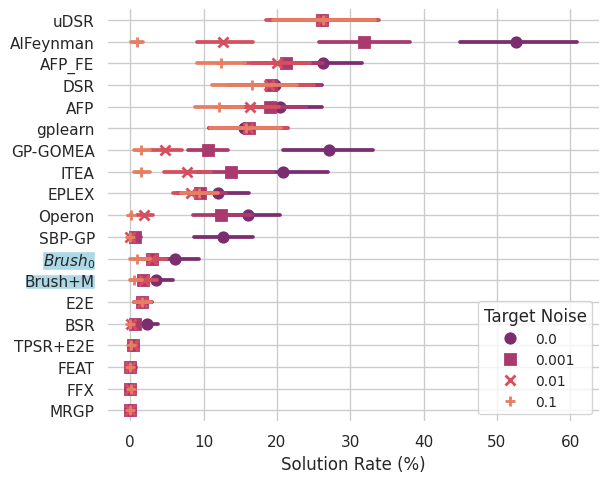

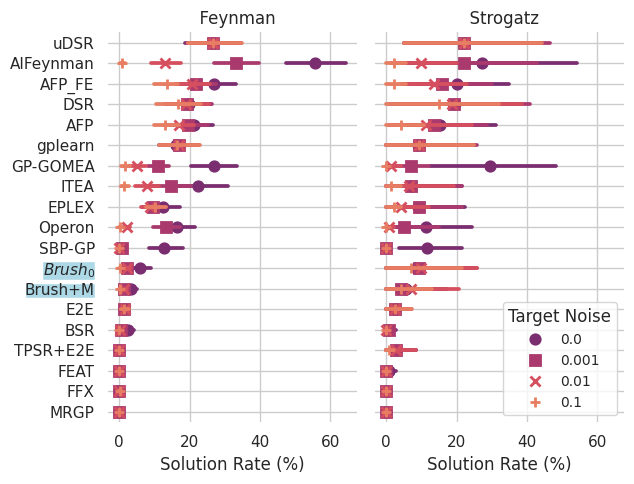

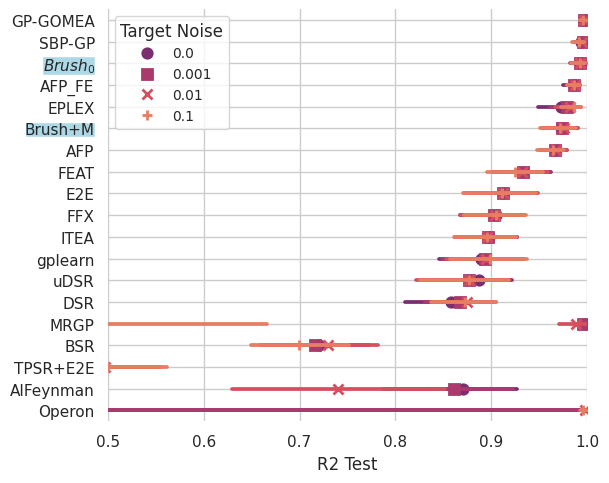

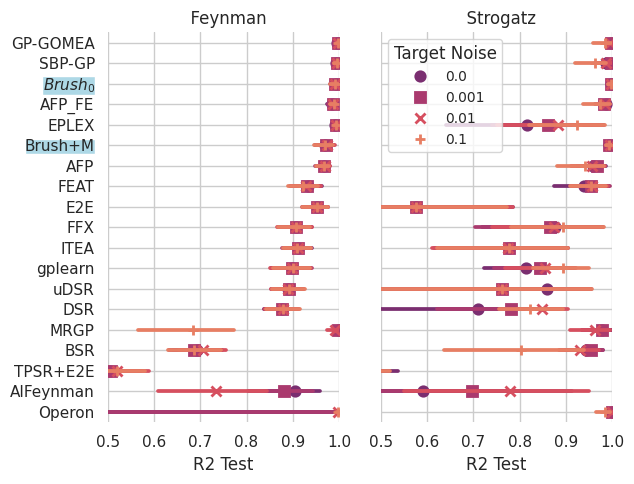

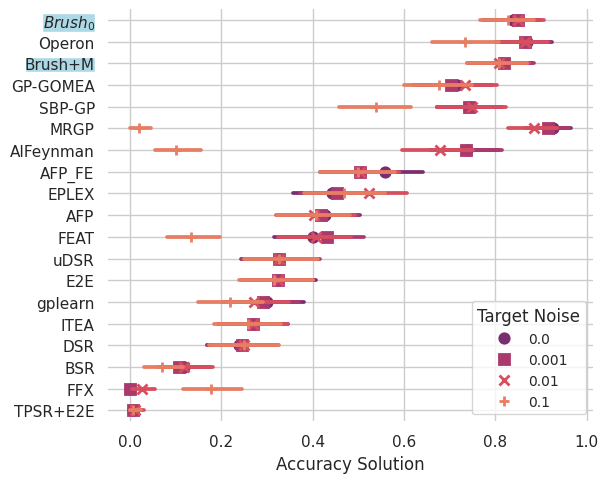

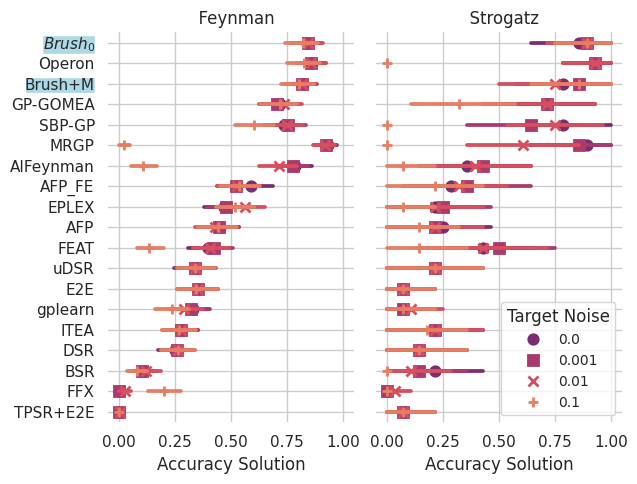

In [18]:
df_sum['*algorithm*'] = df_sum['algorithm'].apply(lambda x: '*'+x if x in symbolic_algs else x)

df_sum.replace( {'split (' : 'split\n('}, inplace=True )

for metric in ['symbolic_solution_rate_(%)','r2_test','accuracy_solution']:
# for metric in ['r2_test']:
    for kind in ['point']: #,'strip']:
        args =dict(df_compare=df_sum, x=metric, est=np.mean, orient='h',
                   kind=kind) 
        if kind=='point': 
            args['join'] = False 
            args['markers']=['o','s','x','+']
        if metric == 'r2_test':
            args['xlim'] = [0.5, 1]
        compare(**args,
                hue='target_noise', 
                col=None,
                ) 
        compare(**args, 
                hue='target_noise', 
                col='data_group',
                ) 

/home/guilherme/miniconda3/envs/python3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  func(x=x, y=y, **kwargs)
/home/guilherme/miniconda3/envs/python3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  func(x=x, y=y, **kwargs)
/home/guilherme/miniconda3/envs/python3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  func(x=x, y=y, **kwargs)
/home/guilherme/miniconda3/envs/python3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws

saving pairgrid_symbolic_solution_rate_(pct)_r2_test_simplified_complexity.pdf


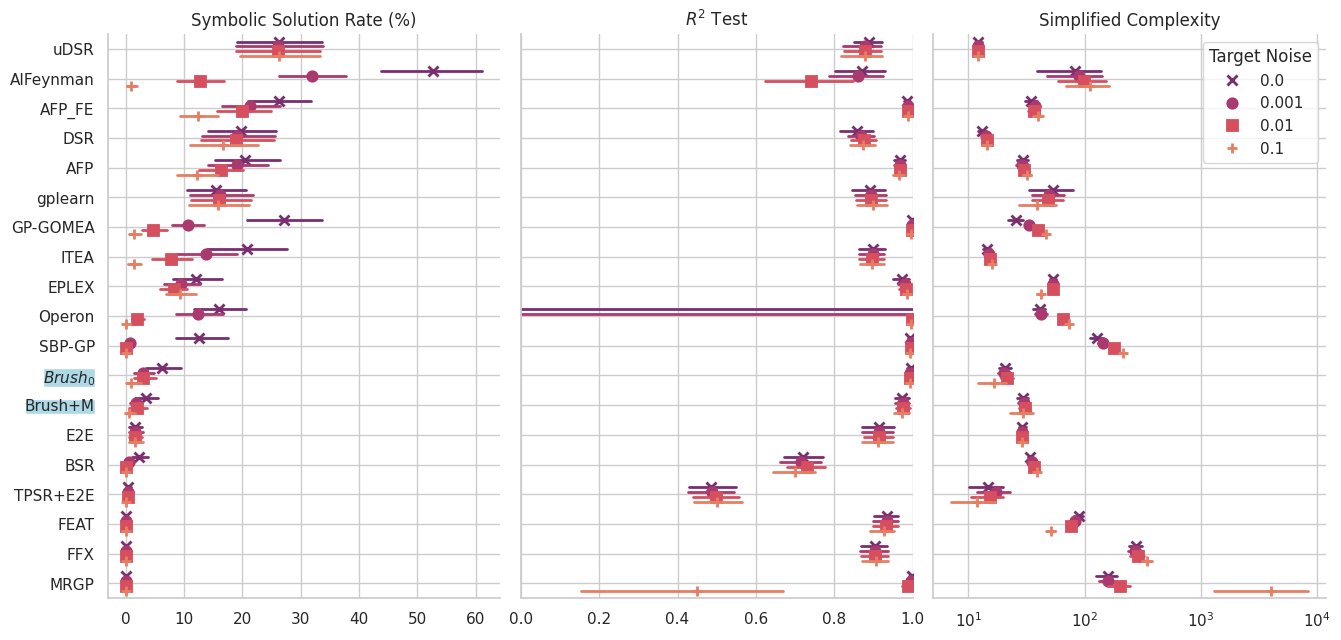

In [19]:
# Make the PairGrid
df_plot = df_sum.copy()
tmp = df_plot.groupby(['target_noise','algorithm'])['symbolic_solution_rate'].mean().unstack().mean()
order = tmp.sort_values(ascending=False).index
df_plot['size_diff'] = df_plot['model_size']-df_plot['simplified_complexity']+1
x_vars=[
#         'accuracy_solution_rate_(%)',
#         'mse_test',
#         'r2_test_rank',
#         'r2_test_norm',
        'symbolic_solution_rate_(%)',
        'r2_test',
        'simplified_complexity',
#         'size_diff',
#         'model_size',
#         'training time (s)',
#         'solution'
]
g = sns.PairGrid(df_plot, 
                 x_vars=x_vars,
                 y_vars=['algorithm'],
                 height=6.5, 
                 aspect=0.7,
      palette=sns.color_palette("flare_r", n_colors=4),
                 hue='target_noise',
#                  hue_order=[0.01,0.001,0]
#                  hue='dataset'
                )
g.map(sns.pointplot, 
#       size=10,
      orient="h",
      # jitter=False,
      order=order,
      palette=sns.color_palette("flare_r", n_colors=4),
      dodge = 0.5,
      errwidth=2,
      # linewidth=0.01,
      # markeredgecolor='w',
      join=False,
      estimator=np.mean,
      n_boot=1000,
      markers=['x','o','s','+'],
      # markeralpha=0.5
     )
plt.legend(title='Target Noise')
titles = [x.replace('_',' ').title().replace('(S)','(s)') for x in x_vars]

for ax, title in zip(g.axes.flat, titles):

    # remove xlabel
    ax.set_xlabel('')
    ax.set_ylabel('')
    # Set a different title for each axes
    ax.set(title=title)
    
    if any([n in title.lower() for n in ['size','complexity','time']]):
        ax.set_xscale('log')
    if 'R2' in title and 'Rank' not in title:
        ax.set(title=title.replace('R2','$R^2$'))
        ax.set_xlim([0,1])

    for ticklbl in ax.yaxis.get_ticklabels():
        if "Brush" in ticklbl.get_text():
            ticklbl.set_bbox(dict(facecolor='lightblue', edgecolor='w', alpha=1, pad=0)) # boxstyle='round',
            # ticklbl.set_c('blue')

    # Make the grid horizontal instead of vertical
    ax.yaxis.grid(True)

save(g, 'pairgrid_'+'_'.join(x_vars))

/tmp/ipykernel_599973/637968910.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_clustermap = df_clustermap[["dataset", "algorithm", "r2_test_rank"]]\


saving clustermap_groundtruth_r2.pdf


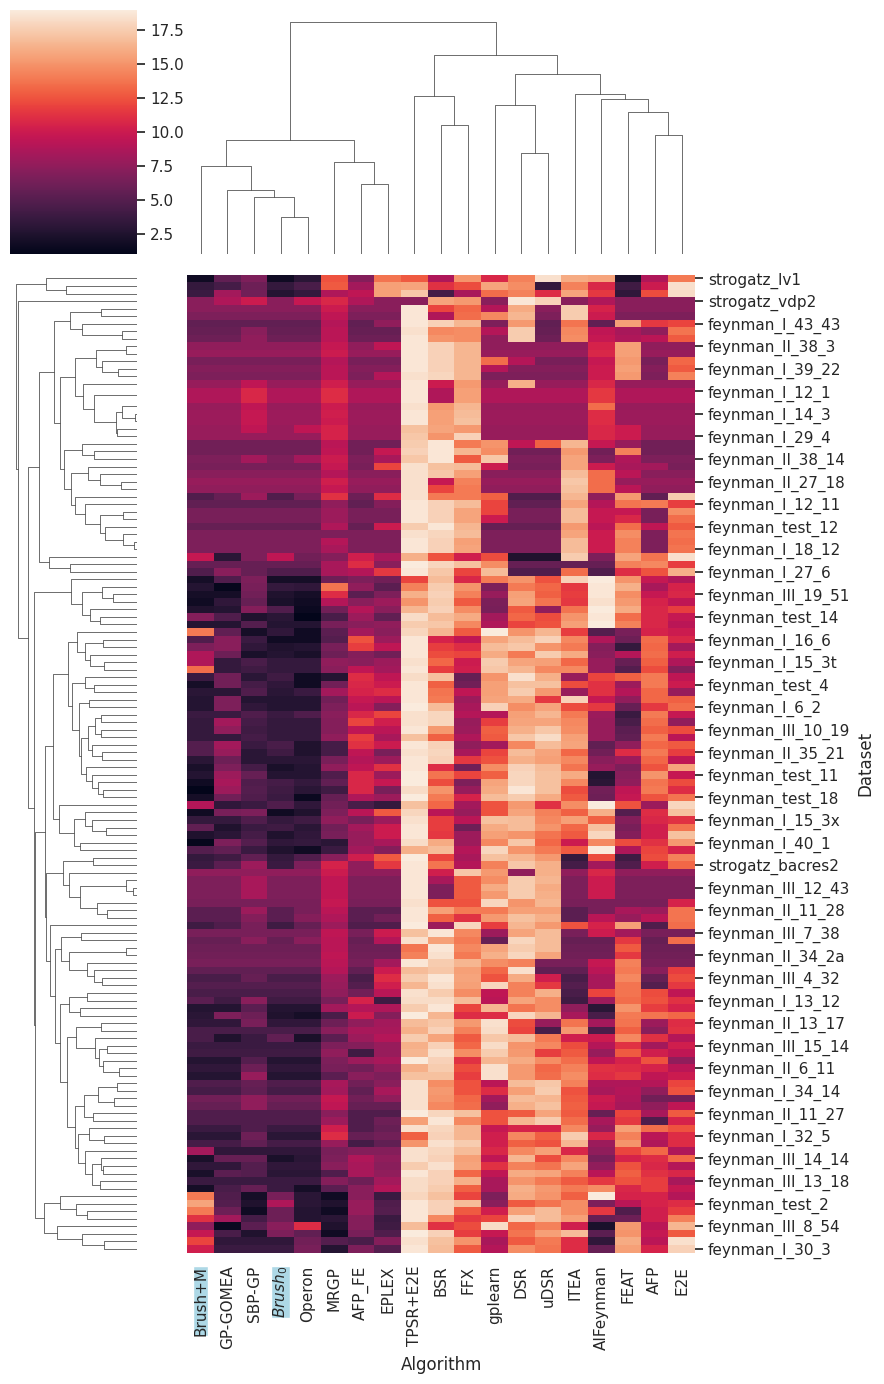

In [20]:
df_clustermap = df_sum.copy() #.loc[df_sum.algorithm.isin(symbolic_algs)]

df_clustermap['*algorithm*'] = df_clustermap['algorithm'].apply(lambda x: x+'*' if x in symbolic_algs else x)

df_clustermap = df_clustermap[["dataset", "algorithm", "r2_test_rank"]]\
        .groupby(["dataset", "algorithm"]).mean().reset_index()\
        .pivot("dataset", columns="algorithm").fillna(df_clustermap["algorithm"].nunique())

df_clustermap.columns = df_clustermap.columns.droplevel()

g = sns.clustermap(
    df_clustermap,
    figsize=(9, 14)
)

for ticklbl in g.ax_heatmap.xaxis.get_ticklabels():
    if "Brush" in ticklbl.get_text():
        ticklbl.set_bbox(dict(facecolor='lightblue', edgecolor='w', alpha=1, pad=0)) # boxstyle='round',
        # ticklbl.set_c('blue')

g.ax_heatmap.set_xlabel("Algorithm")
g.ax_heatmap.set_ylabel("Dataset")

plt.tight_layout()
save(name="clustermap_groundtruth_r2")

,algorithm,dataset,target_noise,data_group,random_state,training time (s),mse_train,mae_train,r2_train,mse_test,...,r2_zero_test_norm,accuracy_solution_rate_rank,accuracy_solution_rate_norm,symbolic_solution_rate_rank,symbolic_solution_rate_norm,accuracy_solution_rate_(%),symbolic_solution_rate_(%),rmse_test,log_mse_test,*algorithm*
6815,MRGP,feynman_II_11_20,0.000,Feynman,16322.5,14518.670034,0.001907,0.028488,0.999958,0.097197,...,0.997201,9,0.375,13,0.0,37.5,0.0,0.311765,0.092759,*MRGP
7804,SBP-GP,feynman_III_14_14,0.001,Feynman,16322.5,28862.980397,0.124802,0.189116,0.997357,0.187149,...,0.995911,12,0.000,10,0.0,0.0,0.0,0.432607,0.171554,*SBP-GP
4254,EPLEX,feynman_II_21_32,0.100,Feynman,16322.5,9592.260411,0.000060,0.006129,0.974815,0.000008,...,0.993535,7,0.200,1,1.0,20.0,10.0,0.002894,0.000008,*EPLEX


/tmp/ipykernel_599973/196941367.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_clustermap = df_clustermap[["dataset", "algorithm", "symbolic_solution_rate_(%)"]]\


saving clustermap_groundtruth_solrate.pdf


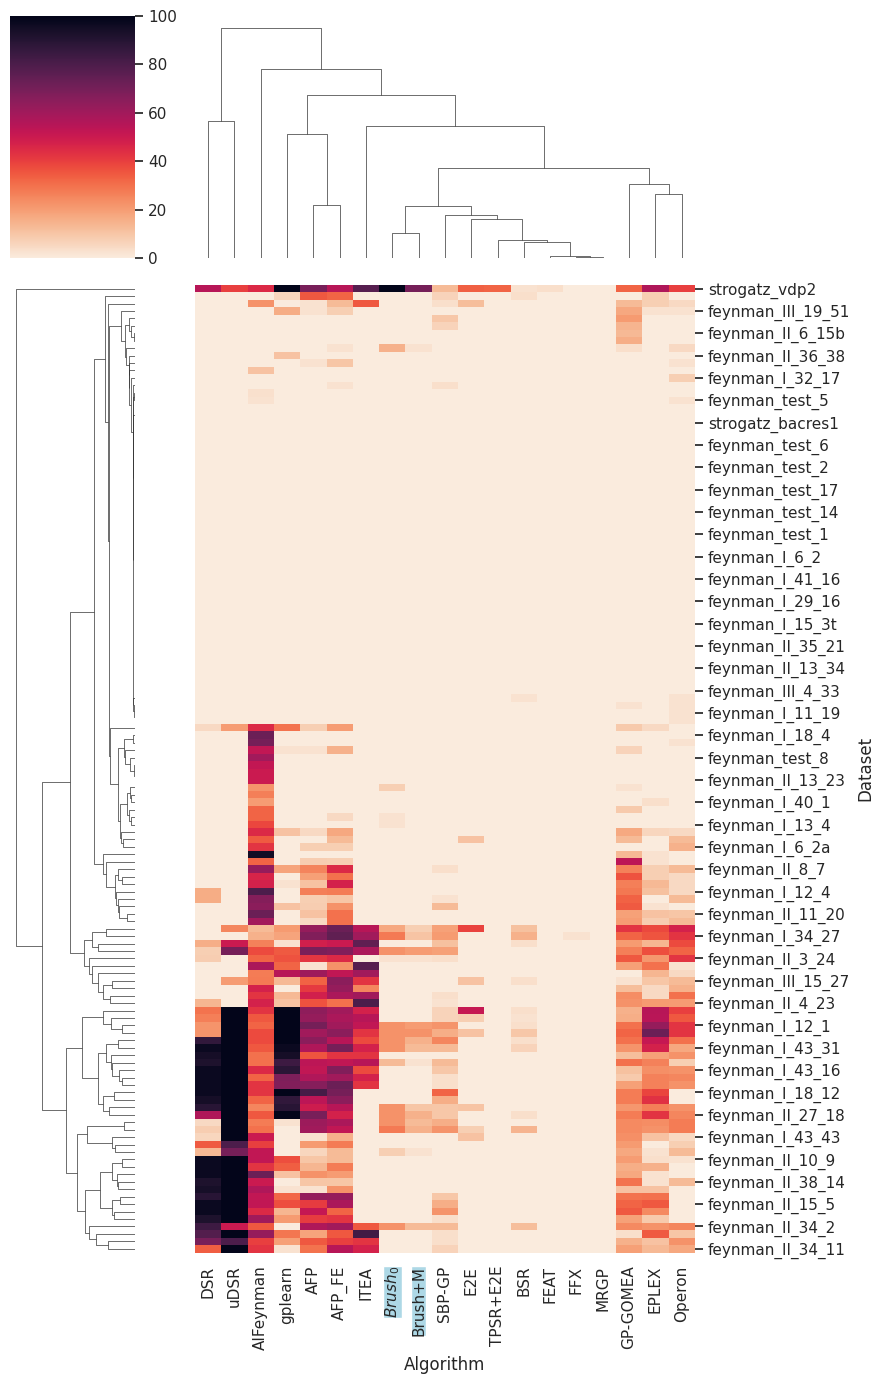

In [21]:
# ['symbolic_solution_rate_(%)','r2_test','accuracy_solution']

df_clustermap = df_sum.copy() #.loc[df_sum.algorithm.isin(symbolic_algs)]

display(df_clustermap.sample(3))
df_clustermap['*algorithm*'] = df_clustermap['algorithm'].apply(lambda x: x+'*' if x in symbolic_algs else x)

df_clustermap = df_clustermap[["dataset", "algorithm", "symbolic_solution_rate_(%)"]]\
        .groupby(["dataset", "algorithm"]).mean().reset_index()\
        .pivot("dataset", columns="algorithm").fillna(df_clustermap["algorithm"].nunique())

df_clustermap.columns = df_clustermap.columns.droplevel()

g = sns.clustermap(
    df_clustermap,
    figsize=(9, 14),
    cmap='rocket_r'
)

for ticklbl in g.ax_heatmap.xaxis.get_ticklabels():
    if "Brush" in ticklbl.get_text():
        ticklbl.set_bbox(dict(facecolor='lightblue', edgecolor='w', alpha=1, pad=0)) # boxstyle='round',
        # ticklbl.set_c('blue')

g.ax_heatmap.set_xlabel("Algorithm")
g.ax_heatmap.set_ylabel("Dataset")

plt.tight_layout()
save(name="clustermap_groundtruth_solrate")

,algorithm,dataset,target_noise,data_group,random_state,training time (s),mse_train,mae_train,r2_train,mse_test,...,r2_zero_test_norm,accuracy_solution_rate_rank,accuracy_solution_rate_norm,symbolic_solution_rate_rank,symbolic_solution_rate_norm,accuracy_solution_rate_(%),symbolic_solution_rate_(%),rmse_test,log_mse_test,*algorithm*
2367,BSR,feynman_I_34_1,0.000,Feynman,16322.5,28800.220632,0.021814,0.092174,0.993117,0.023002,...,0.962546,13,0.125,12,0.0,12.5,0.0,0.151665,0.022742,*BSR
9298,gplearn,strogatz_bacres2,0.000,Strogatz,16322.5,1295.043245,0.198835,0.190342,0.957726,0.145354,...,0.967714,16,0.000,10,0.0,0.0,0.0,0.381253,0.135713,*gplearn
2576,BSR,strogatz_shearflow1,0.001,Strogatz,16322.5,28800.017993,0.010934,0.065921,0.972926,0.017260,...,0.901604,14,0.000,13,0.0,0.0,0.0,0.131378,0.017113,*BSR


/tmp/ipykernel_599973/3237685029.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_clustermap = df_clustermap[["dataset", "algorithm", "accuracy_solution"]]\


saving clustermap_groundtruth.pdf


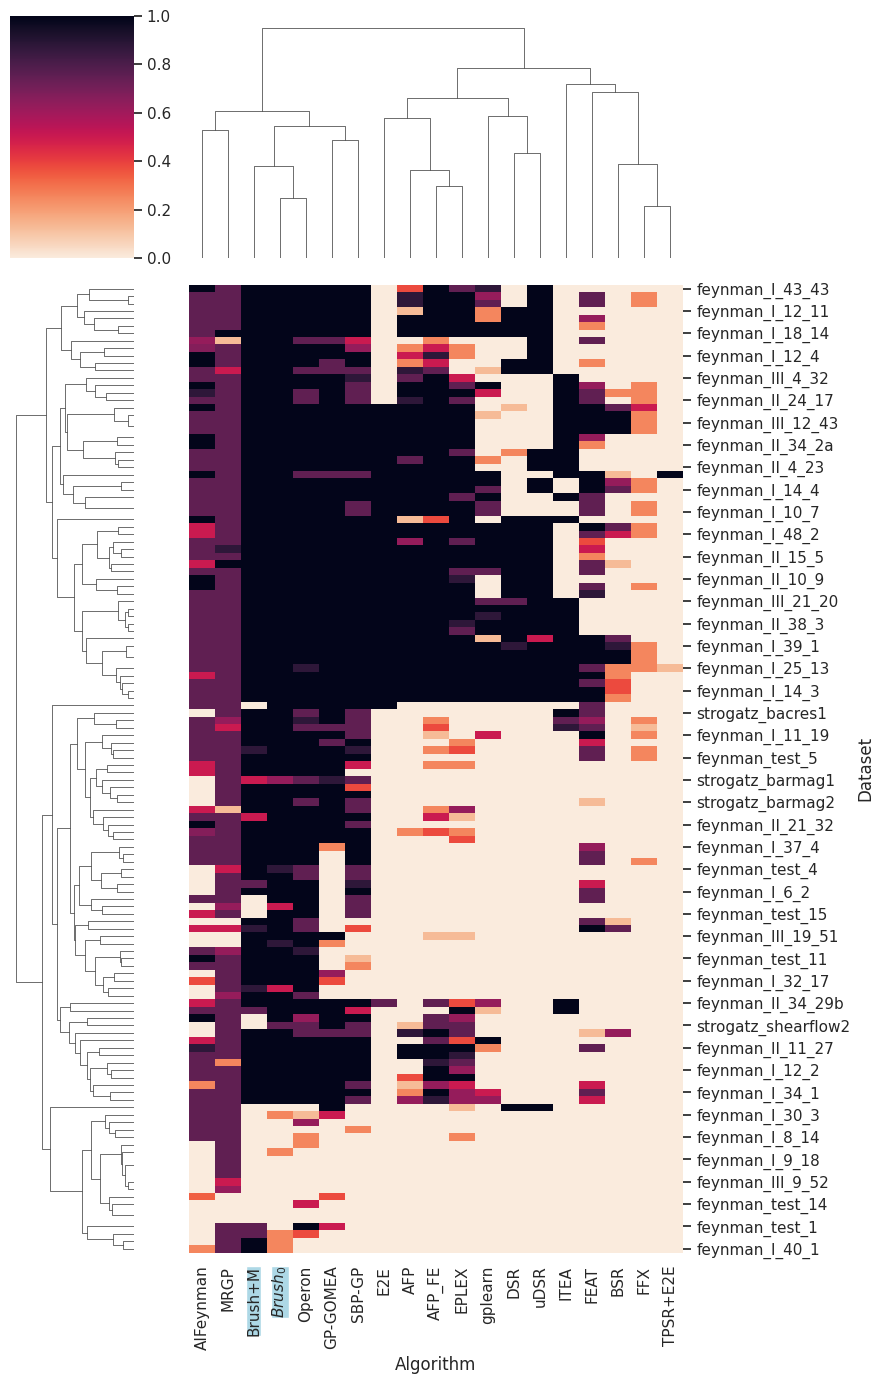

In [22]:
# ['symbolic_solution_rate_(%)','r2_test','accuracy_solution']

df_clustermap = df_sum.copy() #.loc[df_sum.algorithm.isin(symbolic_algs)]

display(df_clustermap.sample(3))
df_clustermap['*algorithm*'] = df_clustermap['algorithm'].apply(lambda x: x+'*' if x in symbolic_algs else x)

df_clustermap = df_clustermap[["dataset", "algorithm", "accuracy_solution"]]\
        .groupby(["dataset", "algorithm"]).mean().reset_index()\
        .pivot("dataset", columns="algorithm").fillna(df_clustermap["algorithm"].nunique())

df_clustermap.columns = df_clustermap.columns.droplevel()

g = sns.clustermap(
    df_clustermap,
    figsize=(9, 14),
    cmap='rocket_r'
)

for ticklbl in g.ax_heatmap.xaxis.get_ticklabels():
    if "Brush" in ticklbl.get_text():
        ticklbl.set_bbox(dict(facecolor='lightblue', edgecolor='w', alpha=1, pad=0)) # boxstyle='round',
        # ticklbl.set_c('blue')

g.ax_heatmap.set_xlabel("Algorithm")
g.ax_heatmap.set_ylabel("Dataset")

plt.tight_layout()
save(name="clustermap_groundtruth")